# Examaning your Data

- #### Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
- #### Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
- #### Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
- #### Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
- #### Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [82]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set the option to display maximum rows to a high number
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


#bring in the six packs
df_train = pd.read_csv('Dataset/train.csv')
#bring in the six packs
df_test = pd.read_csv('Dataset/test.csv')
#bring in the six packs
df_sample_submission = pd.read_csv('Dataset/sample_submission.csv')

### Simple Overview of the Data

#### The data is about Housing Prices

- ### Target: SalePrice

In [83]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

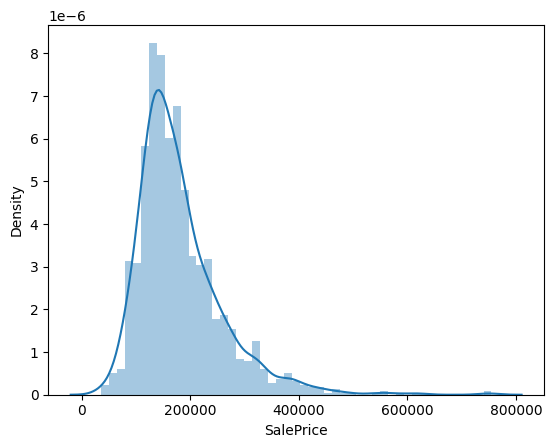

In [84]:
#histogram
sns.distplot(df_train['SalePrice'])

In [85]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282



 kurtosis value higher than 3 suggests that the distribution has fatter tails than a normal distribution (i.e., it is leptokurtic)


- Deviate from the normal distribution.
- Have appreciable positive skewness: This means that there are more extreme values on the right side, and the distribution is stretched in that direction.
- Show peakedness: Leptokurtic (High Peakedness): Indicates a higher probability of extreme values in the distribution. It means that the data has more outliers and is more prone to extreme events.

# Get Most Important Variables

- Import from my DataExplorationToolkit the method most_important_features:
    - Correlation
    - Tree Based Feature Importance
    

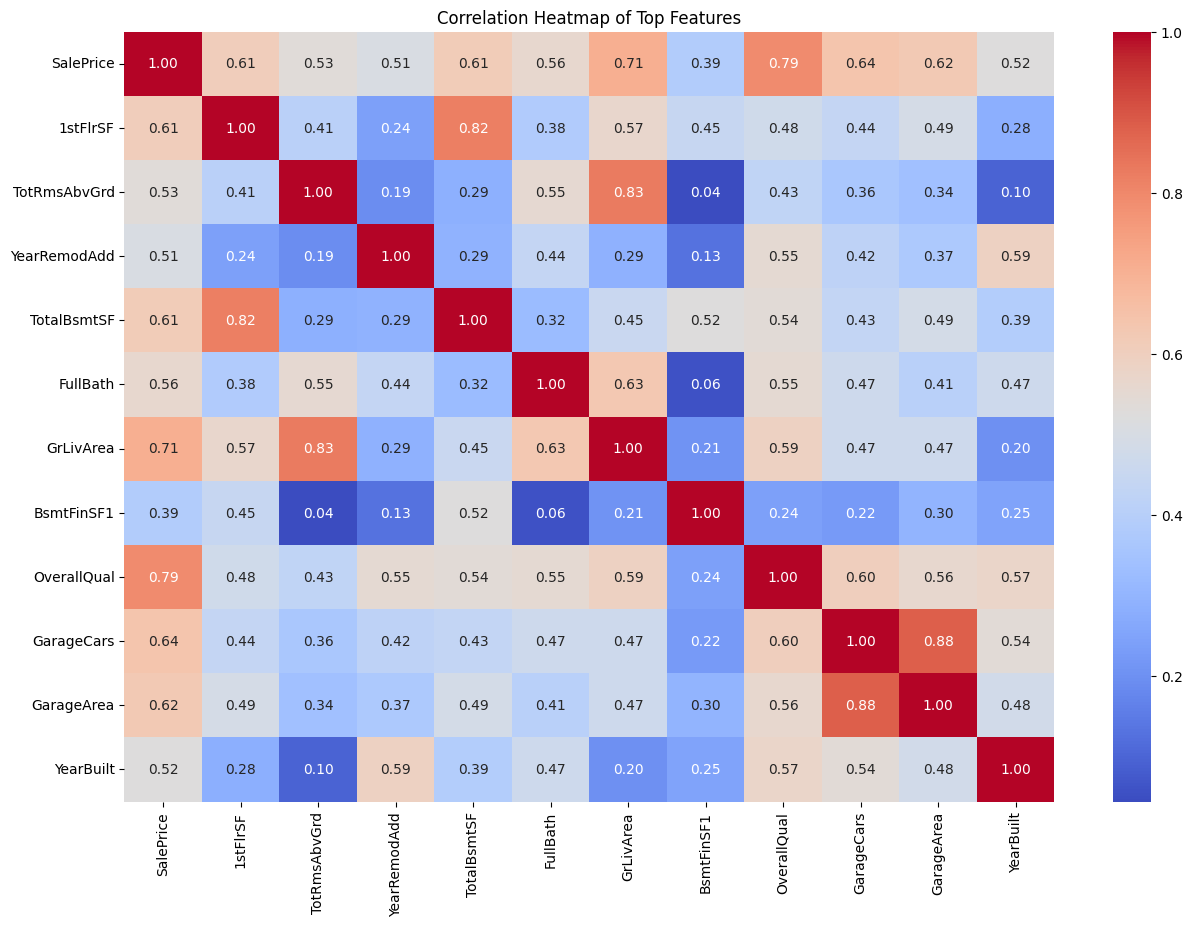

In [86]:
import DataExplorationToolkit as dtl
most_important_variables=dtl.most_important_features(df_train,'SalePrice',15,['Id'])

subset_df = df_train[most_important_variables]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features')
plt.show()

In [87]:
# Split Columns into numerical and categorical

max_value_for_categorical=20
cat_col_forced=['OverallQual','YearBuilt','YearRemodAdd']
all_columns=dtl.return_categorical_numerical_columns(subset_df,cat_col_forced,max_value_for_categorical)
cat_cols=all_columns[0]#categorical Columns
num_cols=all_columns[1]#numerical Columns




##  Relationship with categorical features

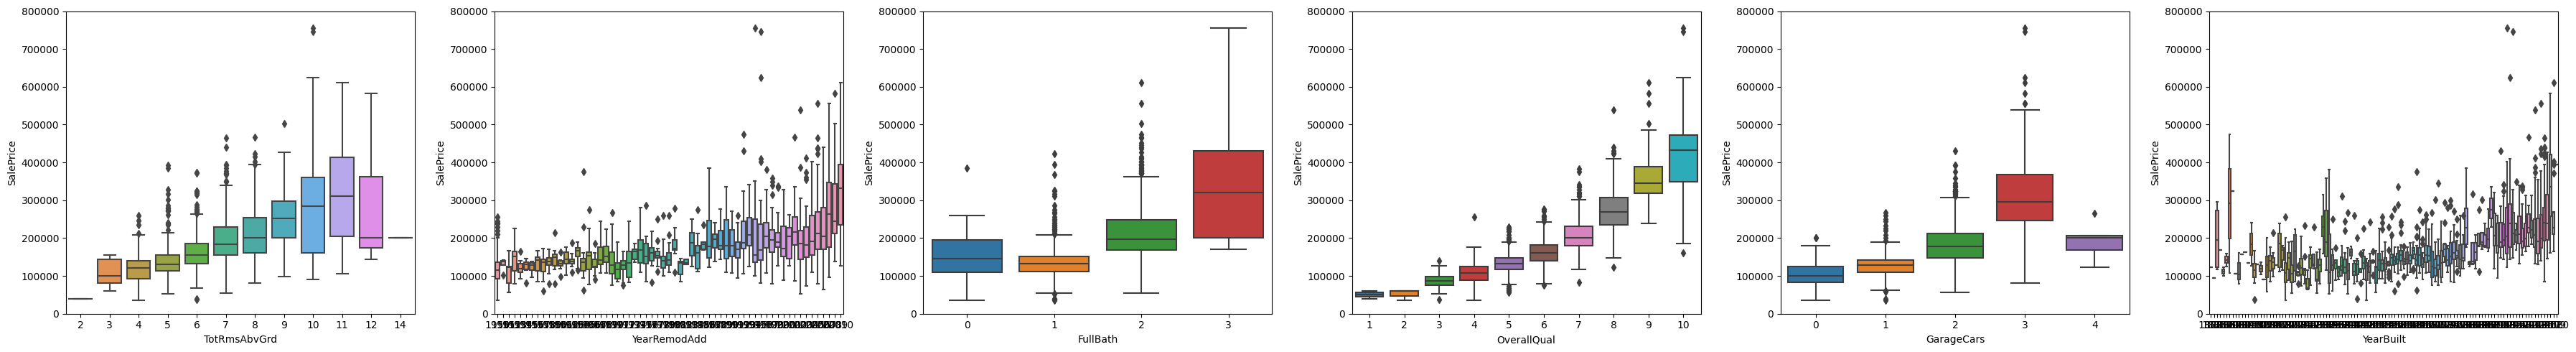

In [88]:

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(6*len(cat_cols), 5))

# Iterate through the categorical columns
for i, var in enumerate(cat_cols):
    data = pd.concat([subset_df['SalePrice'], subset_df[var]], axis=1)
    
    # Create a box plot
    sns.boxplot(x=var, y="SalePrice", data=data, ax=axes[i])
    axes[i].set_ylim(0, 800000)  # Set y-axis limits

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Relationship with numerical features

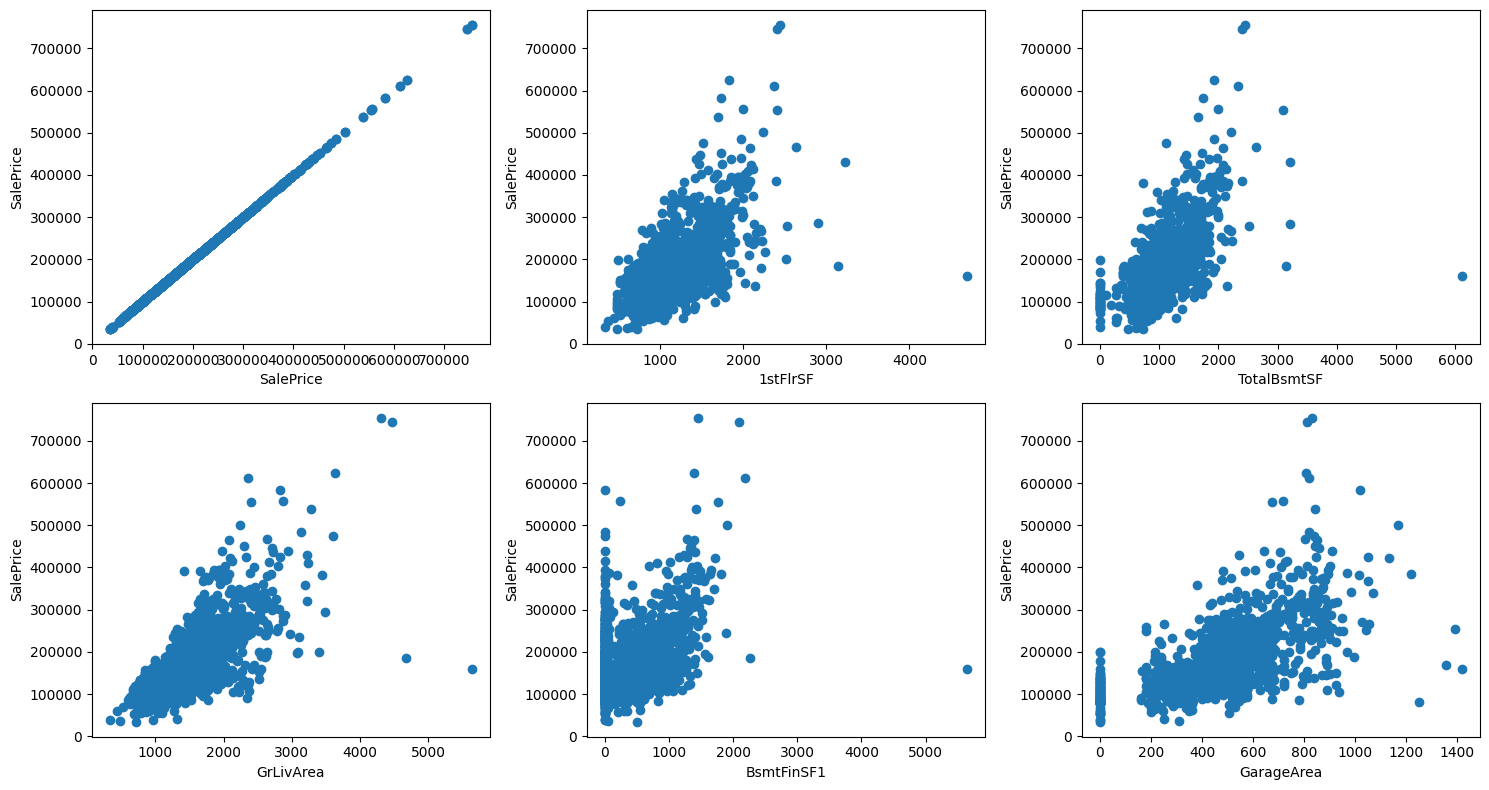

In [89]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the numerical columns
for i, var in enumerate(num_cols):
    data = pd.concat([subset_df['SalePrice'], subset_df[var]], axis=1)
    
    # Create a scatter plot
    axes[i].scatter(data[var], data['SalePrice'])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Missing Values


In [90]:
#missing data
total = subset_df.isnull().sum().sort_values(ascending=False)
percent = (subset_df.isnull().sum()/subset_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

#There are no missing data for the features that we will use

,Total,Percent
SalePrice,0,0.0
1stFlrSF,0,0.0
TotRmsAbvGrd,0,0.0
YearRemodAdd,0,0.0
TotalBsmtSF,0,0.0
FullBath,0,0.0
GrLivArea,0,0.0
BsmtFinSF1,0,0.0
OverallQual,0,0.0
GarageCars,0,0.0


## Outliers


In [91]:

#Univariate analysis
#The primary concern here is to establish a threshold that defines an observation as an outlier.
#To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.


#standardizing data - SalePrice
saleprice_scaled = StandardScaler().fit_transform(subset_df['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)



print("How 'SalePrice' looks with her new clothes:\n"
    "Low range values are similar and not too far from 0.\n"
    "High range values are far from 0 and the 7.something values are really out of range."
    )

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]
How 'SalePrice' looks with her new clothes:
Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.


# Outliers of the numerical features:

- ### The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

- ### The same can be said for the rest of the circled points 



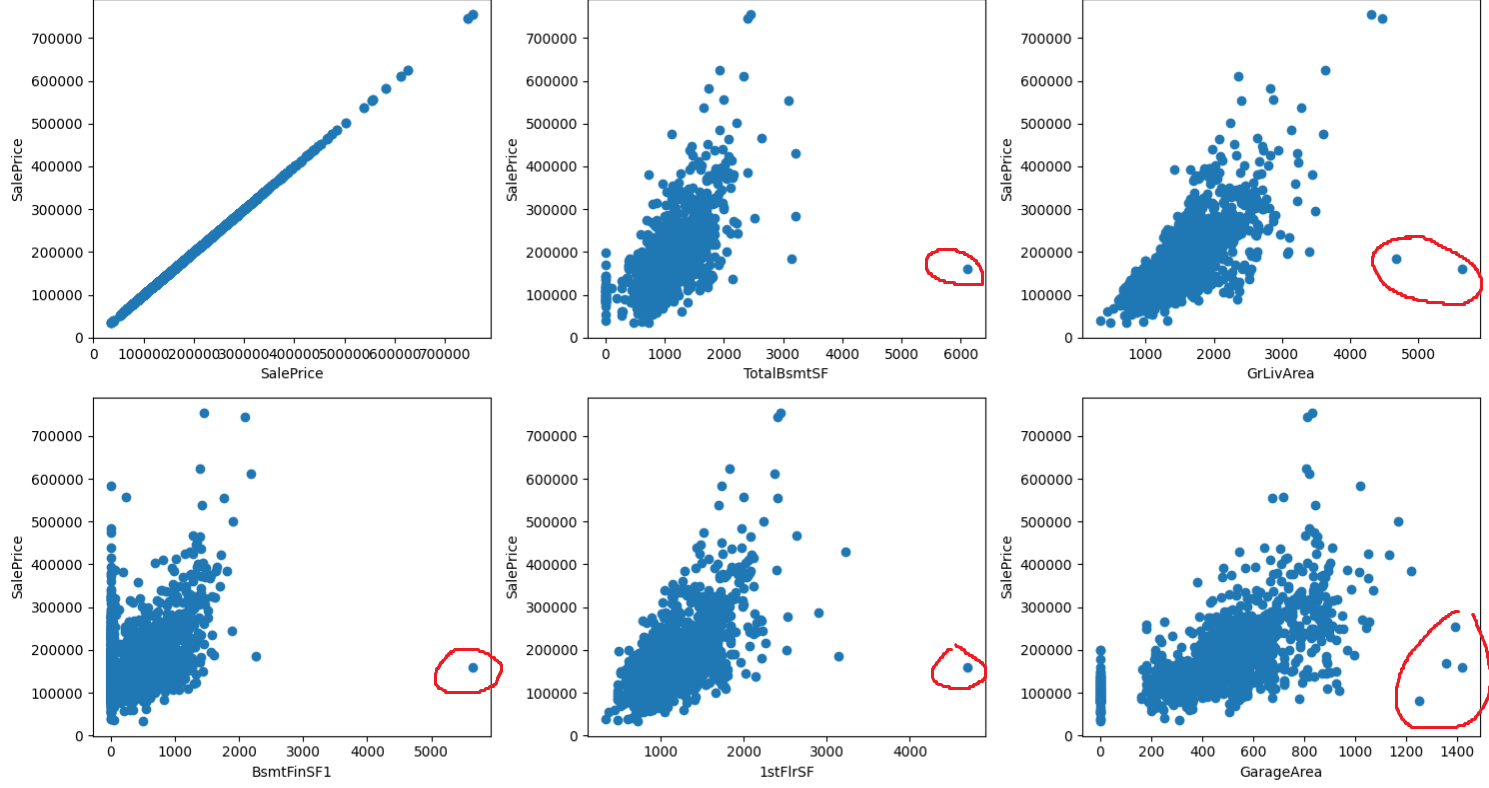

In [92]:
def drop_outliers(df,column_to_order,target):
    for column,num_to_del in column_to_order:
        try:
            index_deleted=df.sort_values(by=[column, target], ascending=[False, False])[:num_to_del].index
            df=df.drop(df.sort_values(by=[column, target], ascending=[False, False])[:num_to_del].index)
            print("Index_deleted: ",index_deleted)
        except:
            print("It was not possible to delete: ", num_to_del," Values from: ",column)
    
    return df


In [93]:
column_to_order=[['GrLivArea', 2]]
subset_df=drop_outliers(subset_df,column_to_order,'SalePrice') # drop outiers

Index_deleted:  Int64Index([1298, 523], dtype='int64')


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

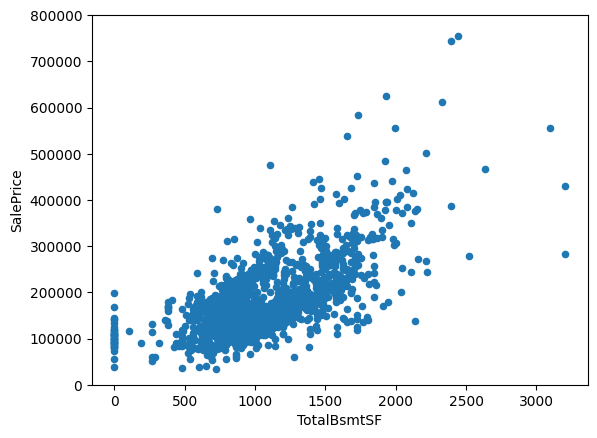

In [94]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([subset_df['SalePrice'], subset_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# Understanding the target

- Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- Homoscedasticity -  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

- Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

    Histogram - Kurtosis and skewness.
    Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

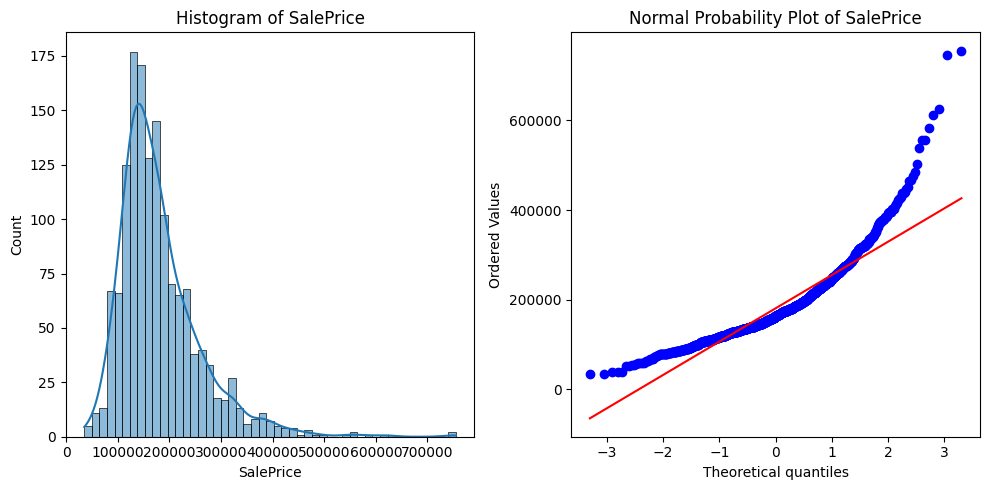

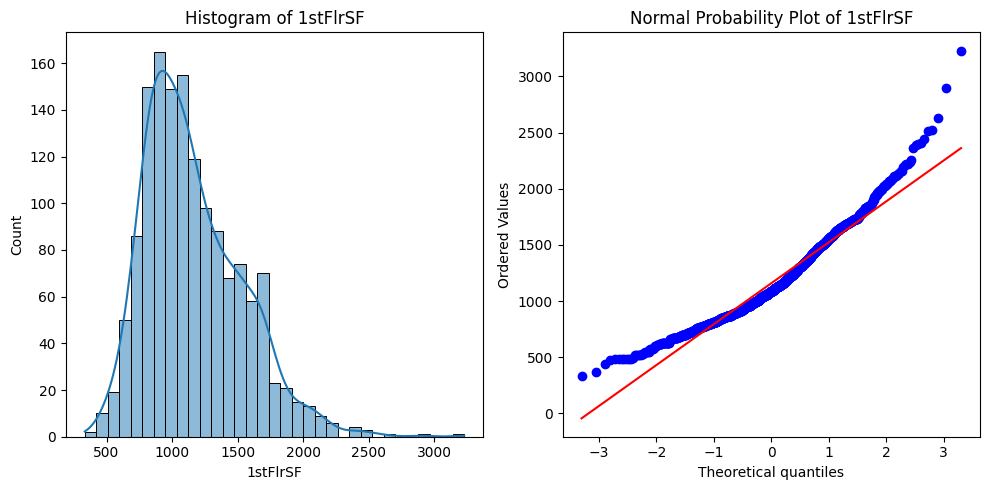

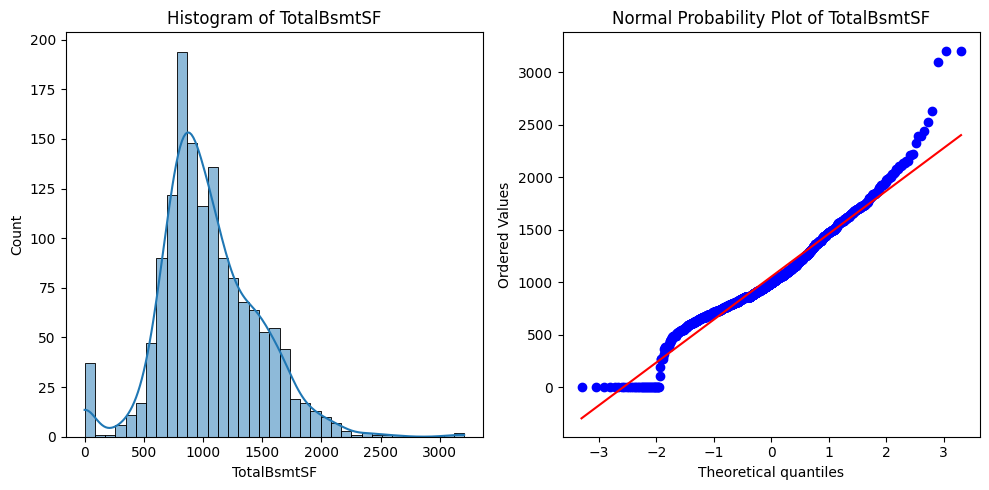

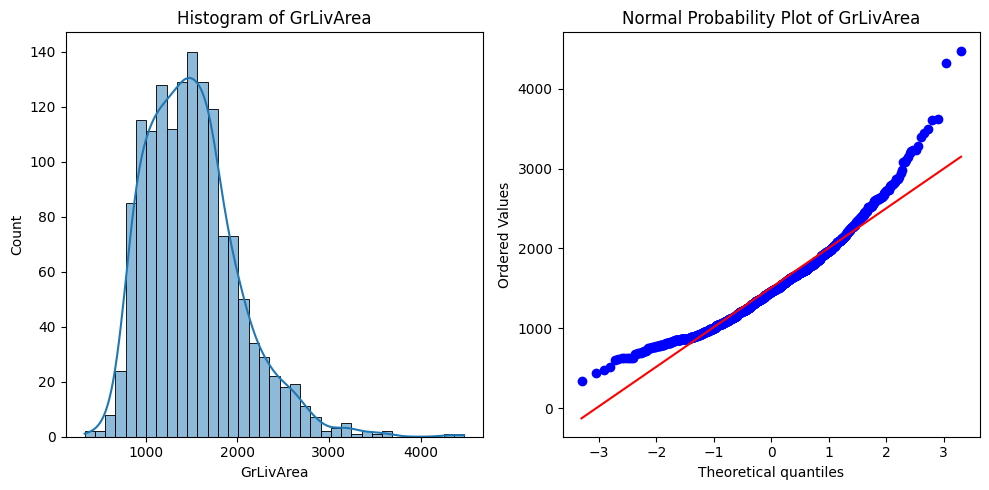

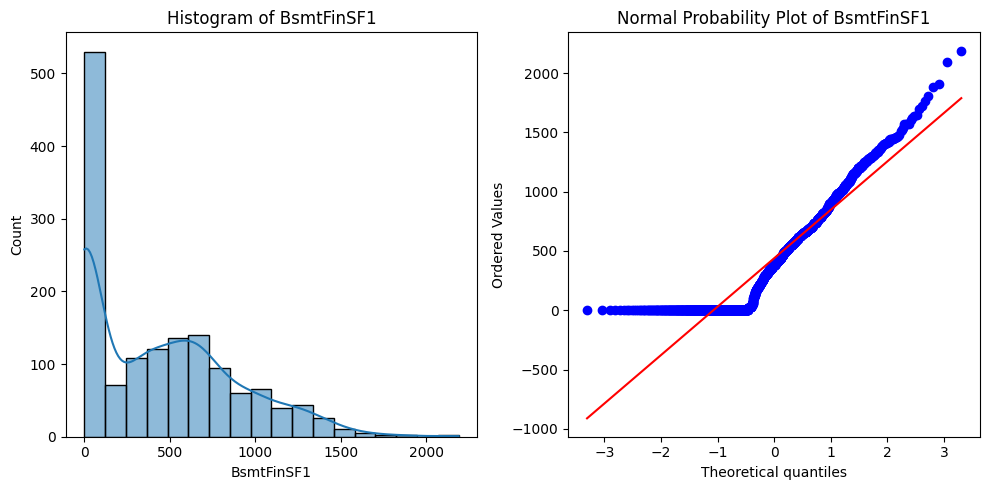

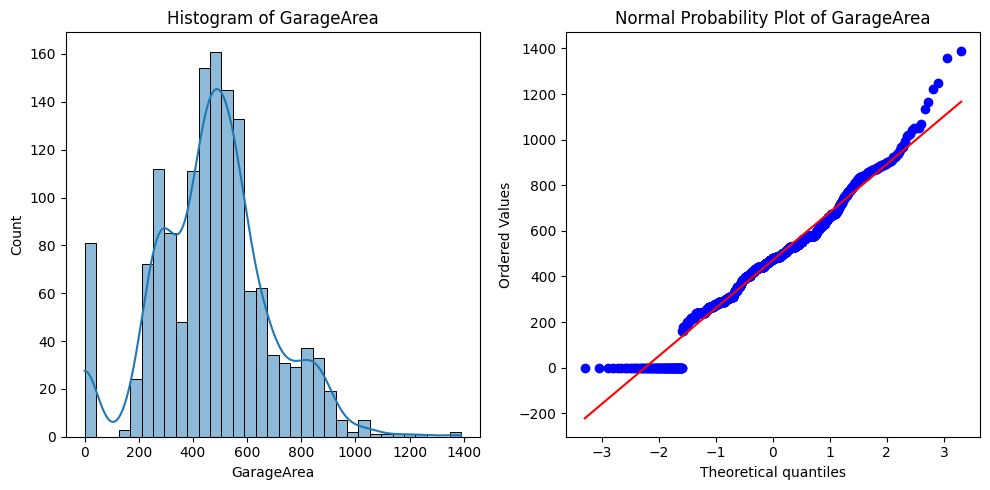

In [95]:
def plot_normality(subset_df,num_cols):
# Plot Numeric Features
    for col in num_cols:
        plt.figure(figsize=(10,5))
        
        # Plot histogram
        plt.subplot(1, 2, 1)
        sns.histplot(subset_df[col], kde=True)
        plt.title(f'Histogram of {col}')
        
        # Plot normal probability plot
        plt.subplot(1, 2, 2)
        stats.probplot(subset_df[col], plot=plt)
        plt.title(f'Normal Probability Plot of {col}')
        
        plt.tight_layout()
        plt.show()


plot_normality(subset_df,num_cols)

# Transformation:
- Skewness -> Use Log transformation on:
    - SalePrice
    - GrLivArea
    - 1stFlrSF


- TotalBsmtSF has Skewness but has alot of values (0):  
    What do we have here?

    Something that, in general, presents skewness.
    A significant number of observations with value zero (houses without basement).
    
    !!! A big problem because the value zero doesn't allow us to do log transformations. !!!
    
    To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

    

In [96]:
#applying log transformation on SalePrice, GrLivArea, 1stFlrSF
subset_df['SalePrice'] = np.log(subset_df['SalePrice'])
subset_df['1stFlrSF'] = np.log(subset_df['1stFlrSF'])
subset_df['GrLivArea'] = np.log(subset_df['GrLivArea'])

#subset_df['TotalBsmtSF'] = np.log(subset_df['TotalBsmtSF'])



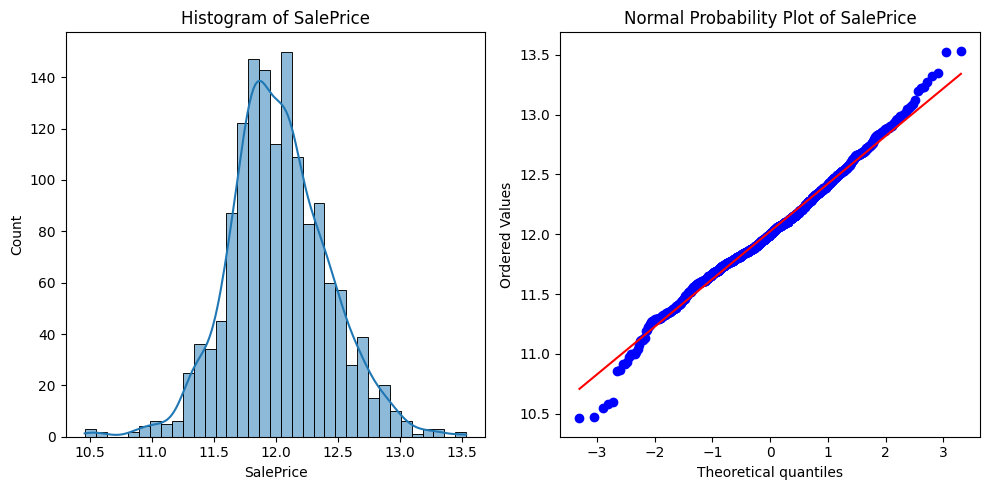

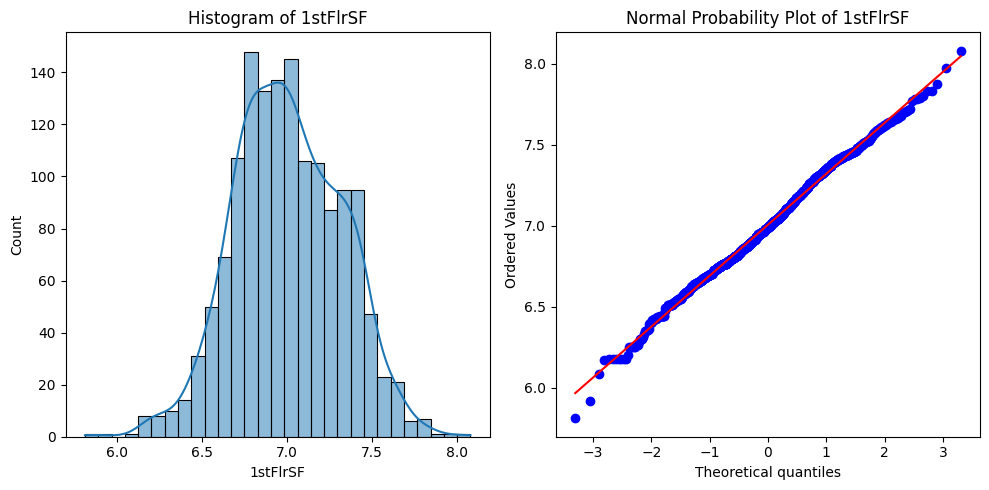

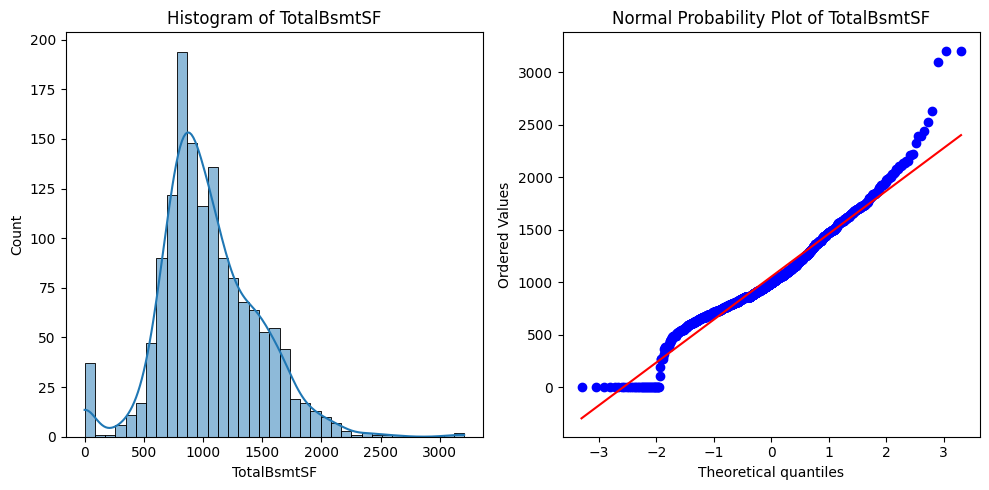

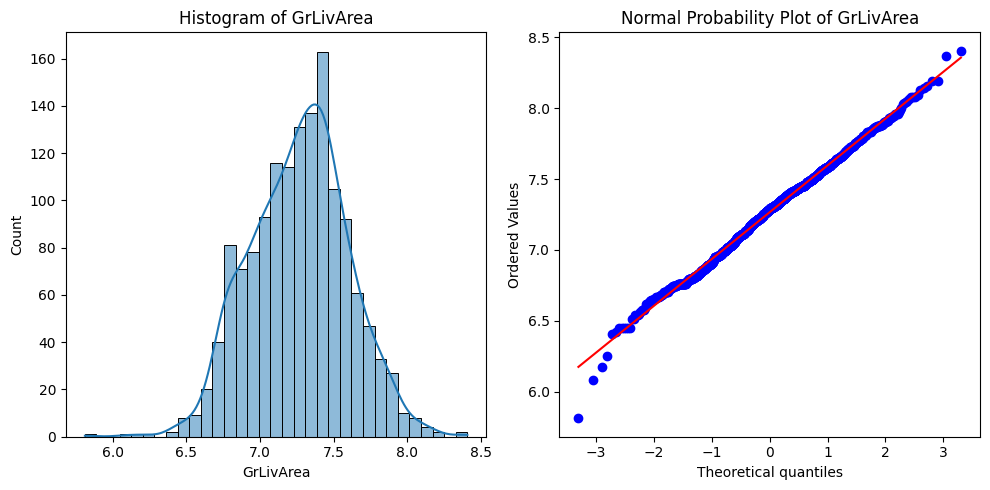

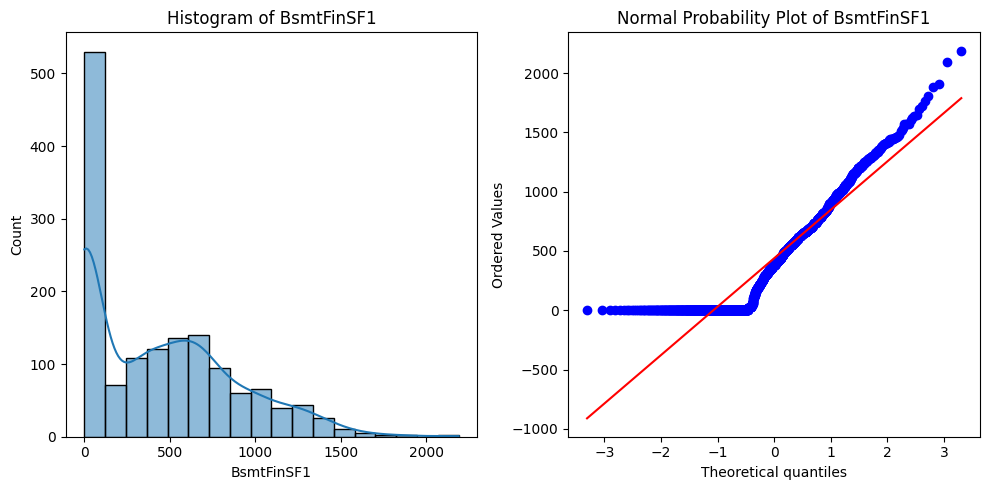

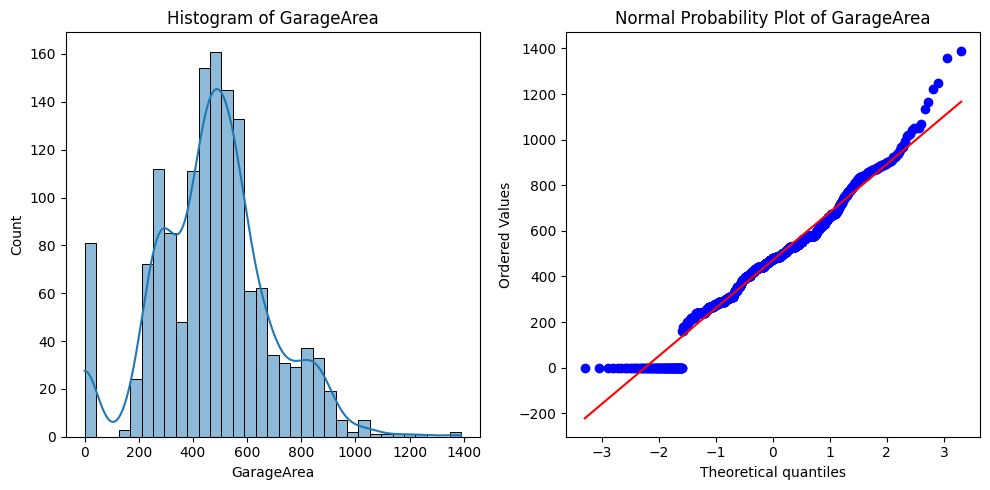

In [97]:
#transformed histogram and normal probability plot
plot_normality(subset_df,num_cols)